In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import Regularizer


import tensorflow.keras.utils as ku 
import numpy as np

In [3]:
with open('America.txt', 'r') as america:
  data = america.read()

tokenizer = Tokenizer()
corpus = data.lower().split('\n')

In [4]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(tokenizer.word_index)

{'i': 1, 'the': 2, 'america': 3, 'to': 4, 'you': 5, 'my': 6, 'a': 7, 'and': 8, 'i’m': 9, 'me': 10, 'in': 11, 'of': 12, 'is': 13, 'when': 14, 'your': 15, 'will': 16, 'be': 17, 'are': 18, 'was': 19, 'all': 20, 'go': 21, 'don’t': 22, 'it': 23, 'this': 24, 'get': 25, 'have': 26, 'them': 27, 'good': 28, 'what': 29, 'for': 30, 'read': 31, 'about': 32, 'serious': 33, 'that': 34, 'russians': 35, 'wants': 36, 'our': 37, 'her': 38, 'by': 39, 'mind': 40, 'right': 41, 'at': 42, 'not': 43, 'made': 44, 'want': 45, 'must': 46, 'it’s': 47, 'haven’t': 48, 'on': 49, 'every': 50, 'from': 51, 'time': 52, 'am': 53, 'us': 54, 'him': 55, 'nothing': 56, 'two': 57, 'january': 58, '17': 59, '1956': 60, 'end': 61, 'war': 62, 'yourself': 63, 'with': 64, 'feel': 65, 'won’t': 66, 'write': 67, 'angelic': 68, 'take': 69, 'can': 70, 'need': 71, 'after': 72, 'who': 73, 'next': 74, 'some': 75, 'tangiers': 76, 'come': 77, 'sinister': 78, 'or': 79, 'up': 80, 'sentimental': 81, 'communist': 82, 'marijuana': 83, 'chance': 8

Convert simple corpus into training data

In [5]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

Pad sequences and create labels

In [6]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create predictors and labels
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Create a model with 2 lstms

In [11]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))  
model.add(Bidirectional(LSTM(150, return_sequences=True)))  
model.add(Dropout(0.2)) 
model.add(LSTM(100))  
model.add(Dense(total_words/2, activation='relu'))  
model.add(Dense(total_words, activation='softmax'))  

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
history = model.fit(predictors, label, epochs=500, verbose=1)

Train on 763 samples
Epoch 1/500
763/763 [==============================] - 9s 11ms/sample - loss: 5.9683 - accuracy: 0.0315
Epoch 2/500
763/763 [==============================] - 7s 9ms/sample - loss: 5.7321 - accuracy: 0.0301
Epoch 3/500
763/763 [==============================] - 7s 9ms/sample - loss: 5.6395 - accuracy: 0.0419
Epoch 4/500
763/763 [==============================] - 6s 8ms/sample - loss: 5.5624 - accuracy: 0.0419
Epoch 5/500
763/763 [==============================] - 6s 8ms/sample - loss: 5.4631 - accuracy: 0.0393
Epoch 6/500
763/763 [==============================] - 6s 8ms/sample - loss: 5.3327 - accuracy: 0.0419
Epoch 7/500
763/763 [==============================] - 7s 9ms/sample - loss: 5.2205 - accuracy: 0.0354
Epoch 8/500
763/763 [==============================] - 7s 9ms/sample - loss: 5.1235 - accuracy: 0.0288
Epoch 9/500
763/763 [==============================] - 7s 9ms/sample - loss: 5.0414 - accuracy: 0.0380
Epoch 10/500
763/763 [=============================

763/763 [==============================] - 7s 10ms/sample - loss: 0.3212 - accuracy: 0.9096
Epoch 80/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.3151 - accuracy: 0.9109
Epoch 81/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.3162 - accuracy: 0.9069
Epoch 82/500
763/763 [==============================] - 7s 9ms/sample - loss: 0.3080 - accuracy: 0.9109
Epoch 83/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.3089 - accuracy: 0.9161
Epoch 84/500
763/763 [==============================] - 7s 9ms/sample - loss: 0.3116 - accuracy: 0.9030
Epoch 85/500
763/763 [==============================] - 7s 9ms/sample - loss: 0.3114 - accuracy: 0.9004
Epoch 86/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.2938 - accuracy: 0.9083
Epoch 87/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.2935 - accuracy: 0.9056
Epoch 88/500
763/763 [==============================] - 7s 10ms/sample 

763/763 [==============================] - 5s 7ms/sample - loss: 0.2305 - accuracy: 0.9109
Epoch 158/500
763/763 [==============================] - 5s 7ms/sample - loss: 0.2297 - accuracy: 0.9148
Epoch 159/500
763/763 [==============================] - 5s 7ms/sample - loss: 0.2326 - accuracy: 0.9030
Epoch 160/500
763/763 [==============================] - 5s 7ms/sample - loss: 0.2292 - accuracy: 0.9083
Epoch 161/500
763/763 [==============================] - 5s 7ms/sample - loss: 0.2287 - accuracy: 0.9148
Epoch 162/500
763/763 [==============================] - 5s 7ms/sample - loss: 0.2311 - accuracy: 0.9043
Epoch 163/500
763/763 [==============================] - 5s 7ms/sample - loss: 0.2320 - accuracy: 0.9083
Epoch 164/500
763/763 [==============================] - 5s 7ms/sample - loss: 0.2282 - accuracy: 0.9096
Epoch 165/500
763/763 [==============================] - 5s 7ms/sample - loss: 0.2309 - accuracy: 0.9096
Epoch 166/500
763/763 [==============================] - 5s 7ms/sampl

Epoch 235/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.8440 - accuracy: 0.7418
Epoch 236/500
763/763 [==============================] - 7s 10ms/sample - loss: 1.2758 - accuracy: 0.6383
Epoch 237/500
763/763 [==============================] - 7s 10ms/sample - loss: 1.1274 - accuracy: 0.6697
Epoch 238/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.7633 - accuracy: 0.7536
Epoch 239/500
763/763 [==============================] - 7s 9ms/sample - loss: 0.4505 - accuracy: 0.8467
Epoch 240/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.3285 - accuracy: 0.8820
Epoch 241/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.2818 - accuracy: 0.9004
Epoch 242/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.2552 - accuracy: 0.9109
Epoch 243/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.2457 - accuracy: 0.9109
Epoch 244/500
763/763 [========================

763/763 [==============================] - 8s 10ms/sample - loss: 0.2117 - accuracy: 0.9122
Epoch 313/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.2172 - accuracy: 0.9083
Epoch 314/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.2196 - accuracy: 0.9096
Epoch 315/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.2185 - accuracy: 0.9083
Epoch 316/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.2145 - accuracy: 0.9096
Epoch 317/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.2120 - accuracy: 0.9122
Epoch 318/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.2159 - accuracy: 0.9122
Epoch 319/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.2157 - accuracy: 0.9096
Epoch 320/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.2138 - accuracy: 0.9096
Epoch 321/500
763/763 [==============================] - 7s 

763/763 [==============================] - 7s 9ms/sample - loss: 0.2113 - accuracy: 0.9135
Epoch 390/500
763/763 [==============================] - 7s 9ms/sample - loss: 0.2134 - accuracy: 0.9096
Epoch 391/500
763/763 [==============================] - 7s 9ms/sample - loss: 0.2129 - accuracy: 0.9083
Epoch 392/500
763/763 [==============================] - 7s 9ms/sample - loss: 0.2115 - accuracy: 0.9109
Epoch 393/500
763/763 [==============================] - 7s 9ms/sample - loss: 0.2128 - accuracy: 0.9056
Epoch 394/500
763/763 [==============================] - 7s 9ms/sample - loss: 0.2124 - accuracy: 0.9135
Epoch 395/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.2097 - accuracy: 0.9135
Epoch 396/500
763/763 [==============================] - 7s 9ms/sample - loss: 0.2120 - accuracy: 0.9135
Epoch 397/500
763/763 [==============================] - 7s 9ms/sample - loss: 0.2137 - accuracy: 0.9122
Epoch 398/500
763/763 [==============================] - 7s 9ms/samp

Epoch 467/500
763/763 [==============================] - 7s 9ms/sample - loss: 0.2101 - accuracy: 0.9109
Epoch 468/500
763/763 [==============================] - 7s 10ms/sample - loss: 0.2078 - accuracy: 0.9096
Epoch 469/500
763/763 [==============================] - 7s 9ms/sample - loss: 0.2091 - accuracy: 0.9109
Epoch 470/500
763/763 [==============================] - 7s 9ms/sample - loss: 0.2090 - accuracy: 0.9135
Epoch 471/500
763/763 [==============================] - 7s 9ms/sample - loss: 0.2081 - accuracy: 0.9083
Epoch 472/500
763/763 [==============================] - 7s 9ms/sample - loss: 0.2063 - accuracy: 0.9096
Epoch 473/500
763/763 [==============================] - 7s 9ms/sample - loss: 0.2086 - accuracy: 0.9135
Epoch 474/500
763/763 [==============================] - 7s 9ms/sample - loss: 0.2103 - accuracy: 0.9083
Epoch 475/500
763/763 [==============================] - 7s 9ms/sample - loss: 0.2112 - accuracy: 0.9056
Epoch 476/500
763/763 [==============================]

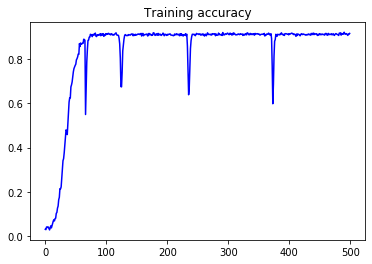

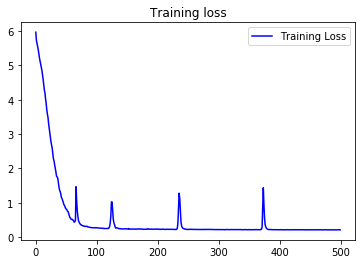

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

As we can see, we could set number of epochs on somewhere about 100

Try on predicting words

In [20]:
seed_text = "My name is "
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

My name is  is to be president despite the fact that i’m a catholic who precision parts factories i’m nearsighted and psychopathic anyway i’m nearsighted and psychopathic anyway free anyway free everybody was all it was all so sincere you have no idea what a good thing the party was in 1835 scott nearing was a grand old man a real mensch mother bloor the silk strikers’ ewig weibliche made me cry i once saw the yiddish orator israel amter plain everybody must have been a spy saw the silk strikers’ ewig weibliche made me cry i once saw the yiddish orator israel


In [21]:
seed_text = "I have never tried "
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

I have never tried  my queer shoulder to the wheel who live in my flowerpots under the light of five hundred suns were free everybody was angelic and sentimental about the workers it was all so sincere you have no idea what a good thing the party was in 1835 scott nearing was a grand old man a real mensch mother bloor the silk strikers’ ewig weibliche made me cry i once saw the yiddish orator israel amter plain everybody must have been a spy saw the silk strikers’ ewig weibliche made me cry i once saw the yiddish orator israel amter plain everybody


Comments: corpus seems to contain not enough data